
# Project: Investigate a Dataset - [TMDB movie data]


<a id='intro'></a>
## Introduction

### Dataset Description 

>  This data set contains information about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

### Question(s) for Analysis
> **1)**Which genres are
most popular from
year to year? 

>**2)**What are the top 10
movies that have high
revenues?

>**3)**What are the max & min runtime and its limitation ?

>**4)** Are the numbers of release movies changed from year to year?
>and which year has the max. no. of release movies?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#to find the no. of movies (rows) and their characteristics (columns)
df.shape

(10866, 21)

In [5]:
# inspect data type and look for instances of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# to get some statistics about our dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# check for duplicates in the data
sum(df.duplicated())

1

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape   # to check after dropping the duplicated row

(10865, 21)

In [9]:
# to check the NaN value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# drop unneeded columns 
df.drop(['production_companies', 'keywords', 'tagline', 'cast','homepage','imdb_id','overview'], axis=1, inplace=True)

# confirm changes
df.head(1)


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
df.shape # to check no. of columns after dropping

(10865, 14)

In [12]:
# drop rows with any null values 
df.dropna(inplace=True)

In [13]:
# checks if any of columns has NaN value, should print False
df.isnull().sum().any()

False

In [14]:
df.shape

(10800, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### a general look on the data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3afcdd4e0>,
      dtype=object)

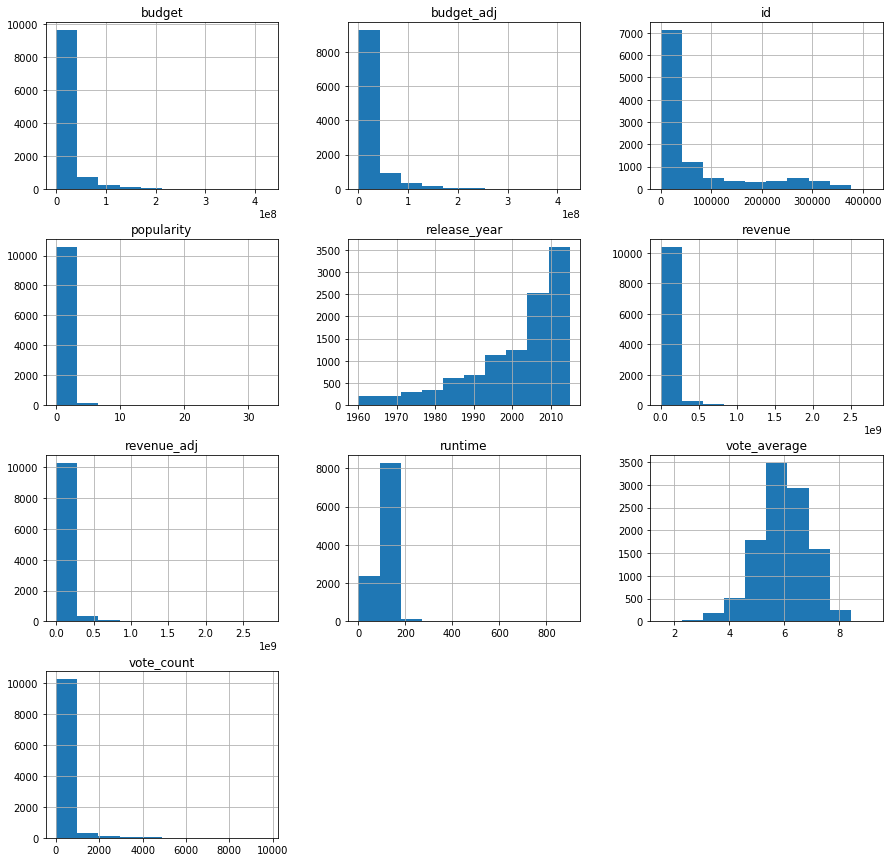

In [15]:
#histgram of whole dataset
df.hist(figsize=(15,15))

### Research Question 1 (Which genres are most popular from year to year?!)

In [16]:
#‘genres’ column contains multiple values separated by pipe (|) characters.So we will seprate them.
dg=df['genres'].str.get_dummies(sep='|')
#We will sum each ‘genres’ to check the most repeated ones.
dg1=dg.sum().reset_index()

Text(0,0.5,'the sum')

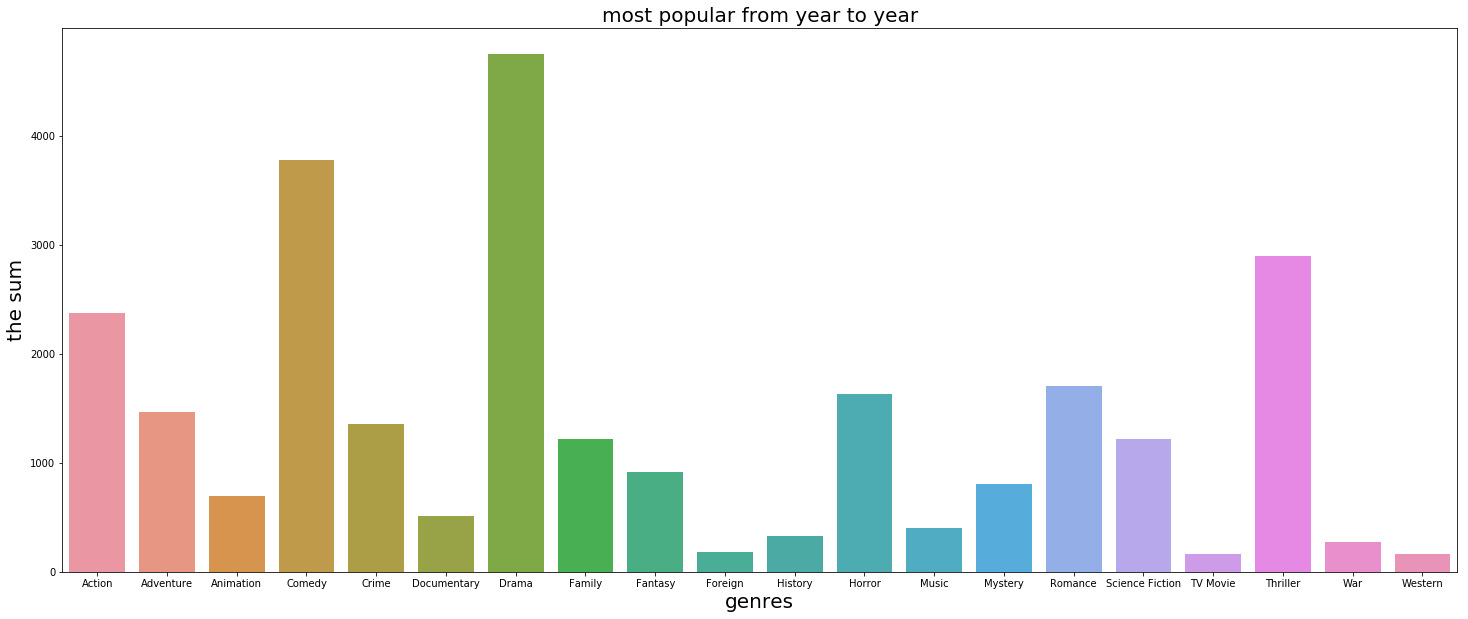

In [17]:
plt.figure(figsize=(25,10))
sns.barplot(x=dg.columns,y=dg.sum())

plt.title('most popular from year to year', fontsize=20)
plt.xlabel('genres',fontsize=20)
plt.ylabel('the sum',fontsize=20)

#### from the above fig. we find the most popular genres are Drama,Comedy,Thriller,Action and Romance

### Research Question 2  (What are the top 10 movies that have high revenues?)

In [18]:
#we added a new column named profit in the data set
df['profit']=df['revenue']-df['budget'] 
#we'll sort the movies descending according to their profit
popular=df[['original_title','profit']].sort_values('profit',ascending=False).head(10)
popular


,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


Text(0,0.5,'profit')

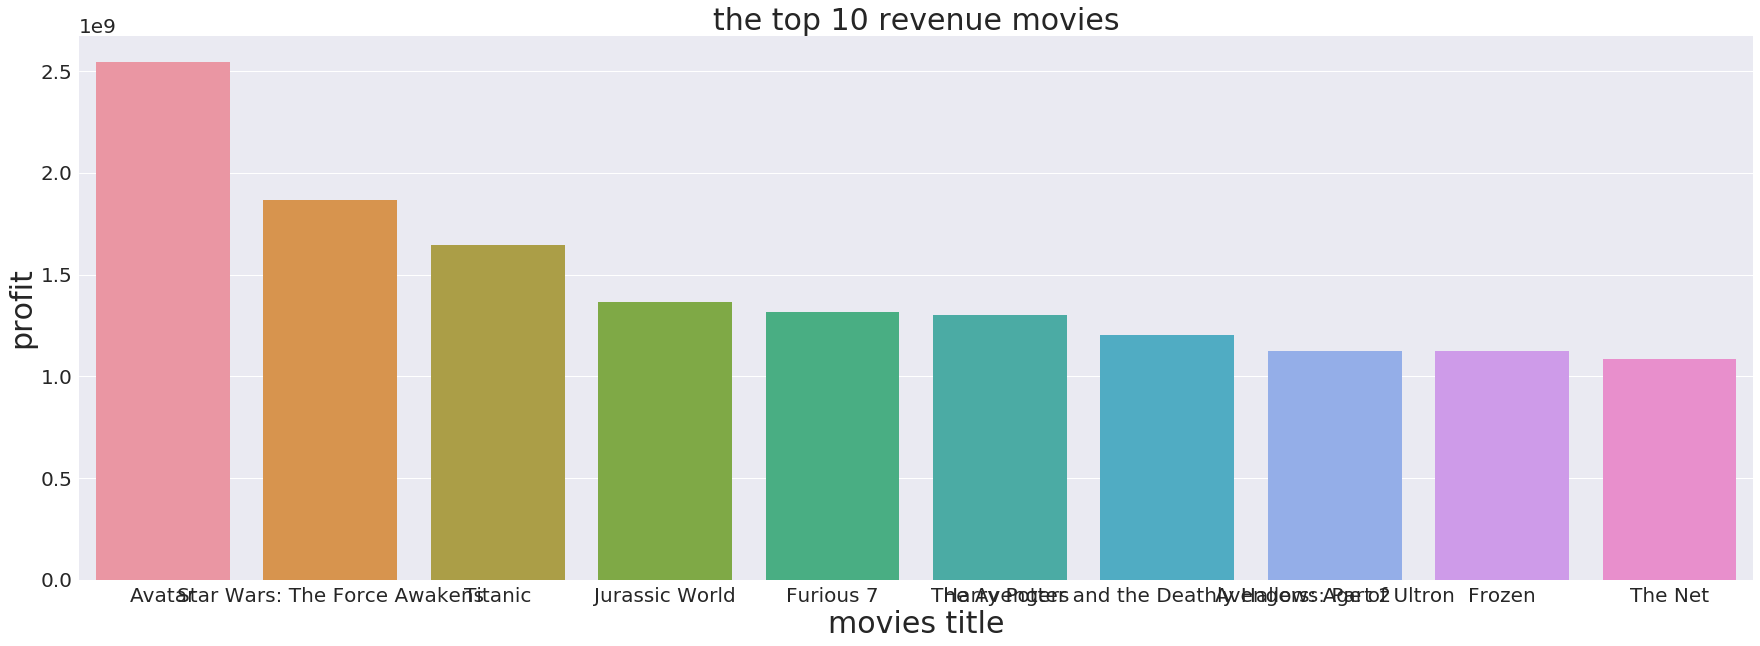

In [19]:
plt.figure(figsize=(30,10))
sns.set(font_scale=2)
sns.barplot(x='original_title',y='profit',data=popular)
plt.title('the top 10 revenue movies',fontsize=30)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('profit',fontsize=30)

as cleear from the above that the top 10 movies have high revenue are:
    1) Avatar       2)Star Wars: The Force Awakens                  3)Titanic                 4)Jurassic World  5)Furious 7  
    6)The Avengers  7)Harry Potter and the Deathly Hallows: Part    8)Avengers: Age of Ultro  9)Frozen          10)The Net

### Research Question 3  (What are the max & min runtime movies and its limitation ?)

In [20]:
#get some statistics for runtime column
df.describe().runtime

count    10800.000000
mean       102.189722
std         30.783873
min          0.000000
25%         90.000000
50%         99.000000
75%        111.250000
max        900.000000
Name: runtime, dtype: float64

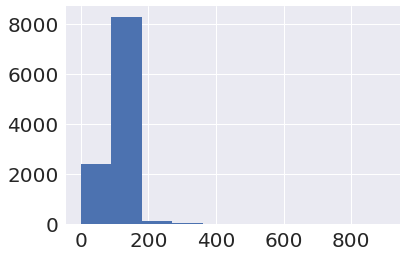

In [21]:
df.runtime.hist()

from the describe function and histgram of runtime column we find that the most of data concentreated from Q1:90 to Q3:111
so we will make the limitation for the run time from 50 t0 200 to avoid outliers 

Text(0,0.5,'numbers')

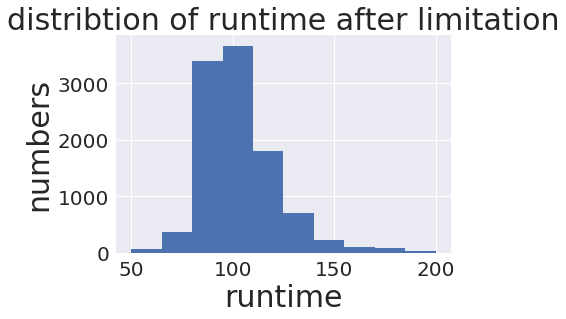

In [22]:
plt.hist(df['runtime'],range=(50,200),bins=10)
plt.title('distribtion of runtime after limitation',fontsize=30)
plt.xlabel('runtime',fontsize=30)
plt.ylabel('numbers',fontsize=30)


In [23]:
#get the original title of the max runtime
maximum_runtime=df.original_title[df.runtime==df.runtime.max()]
print('the title of max runtime  is : ',maximum_runtime)
print('the max.runtime is',df['runtime'].max())

#get the original title of the min runtime
minimum_runtime=list(df.original_title[df.runtime==df.runtime.min()])
print('the title of min runtime  is : ',minimum_runtime)
print('the max.runtime is',df['runtime'].min())


the title of max runtime  is :  3894    The Story of Film: An Odyssey
Name: original_title, dtype: object
the max.runtime is 900
the title of min runtime  is :  ['Mythica: The Necromancer', 'Ronaldo', 'Anarchy Parlor', 'The Exorcism of Molly Hartley', 'If There Be Thorns', 'Deep Dark', 'The Outfield', 'Treehouse', 'Tim Maia', 'Spectacular!', 'Grande, grosso e Verdone', 'Toi, moi, les autres', 'Cell 213', 'eCupid', "Madea's Family Reunion", 'A Time for Dancing', 'Rags', 'How to Fall in Love', "Madea's Class Reunion", 'Skinwalker Ranch', 'The Food Guide to Love', 'Go Goa Gone', 'Amiche da morire', 'The Vatican Exorcisms', 'The 12 Dogs of Christmas', 'Quatre Ã©toiles', 'Jean-Philippe', 'Mission Kashmir']
the max.runtime is 0


from the above we find the longest movie is The Story of Film: An Odyssey with runtime 900 (15 hours)
and the shortest movies are ['Mythica: The Necromancer', 'Ronaldo', 'Anarchy Parlor', 'The Exorcism of Molly Hartley', 'If There Be Thorns', 'Deep Dark', 'The Outfield', 'Treehouse', 'Tim Maia', 'Spectacular!', 'Grande, grosso e Verdone', 'Toi, moi, les autres', 'Cell 213', 'eCupid', "Madea's Family Reunion", 'A Time for Dancing', 'Rags', 'How to Fall in Love', "Madea's Class Reunion", 'Skinwalker Ranch', 'The Food Guide to Love', 'Go Goa Gone', 'Amiche da morire', 'The Vatican Exorcisms', 'The 12 Dogs of Christmas', 'Quatre Ã©toiles', 'Jean-Philippe', 'Mission Kashmir'] with runtime 0 which is unlogic
so we must remove this outliers data

In [24]:
#remove the outliers
df_new=df[(df['runtime']>40) & (df['runtime']<=200) ]
df_new.describe().runtime

count    10494.00000
mean       102.82752
std         19.04367
min         41.00000
25%         90.00000
50%         99.00000
75%        112.00000
max        200.00000
Name: runtime, dtype: float64

In [25]:
#get the original title of the max runtime after skip the data above 200
maximum_runtime=df_new.original_title[df_new.runtime==df_new.runtime.max()]
print('the title of max runtime  is : ',maximum_runtime)
print('the max.runtime is',df_new['runtime'].max())
#get the original title of the min runtime after skip the data below 40
minimum_runtime=df_new.original_title[df_new.runtime==df_new.runtime.min()]
print('the title of min runtime  is : ',minimum_runtime)
print('the min.runtime is',df_new['runtime'].min())

the title of max runtime  is :  9758    The Godfather: Part II
Name: original_title, dtype: object
the max.runtime is 200
the title of min runtime  is :  1029    Marvel: 75 Years, From Pulp to Pop!
1750                          Hulk vs. Thor
1752                       Under the Sea 3D
4874          Amy Schumer: Mostly Sex Stuff
6691                            Deep Sea 3D
Name: original_title, dtype: object
the min.runtime is 41


### Research Question 4  (Are the numbers of release movies changed from year to year?and which year has the max. no. of release movies)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

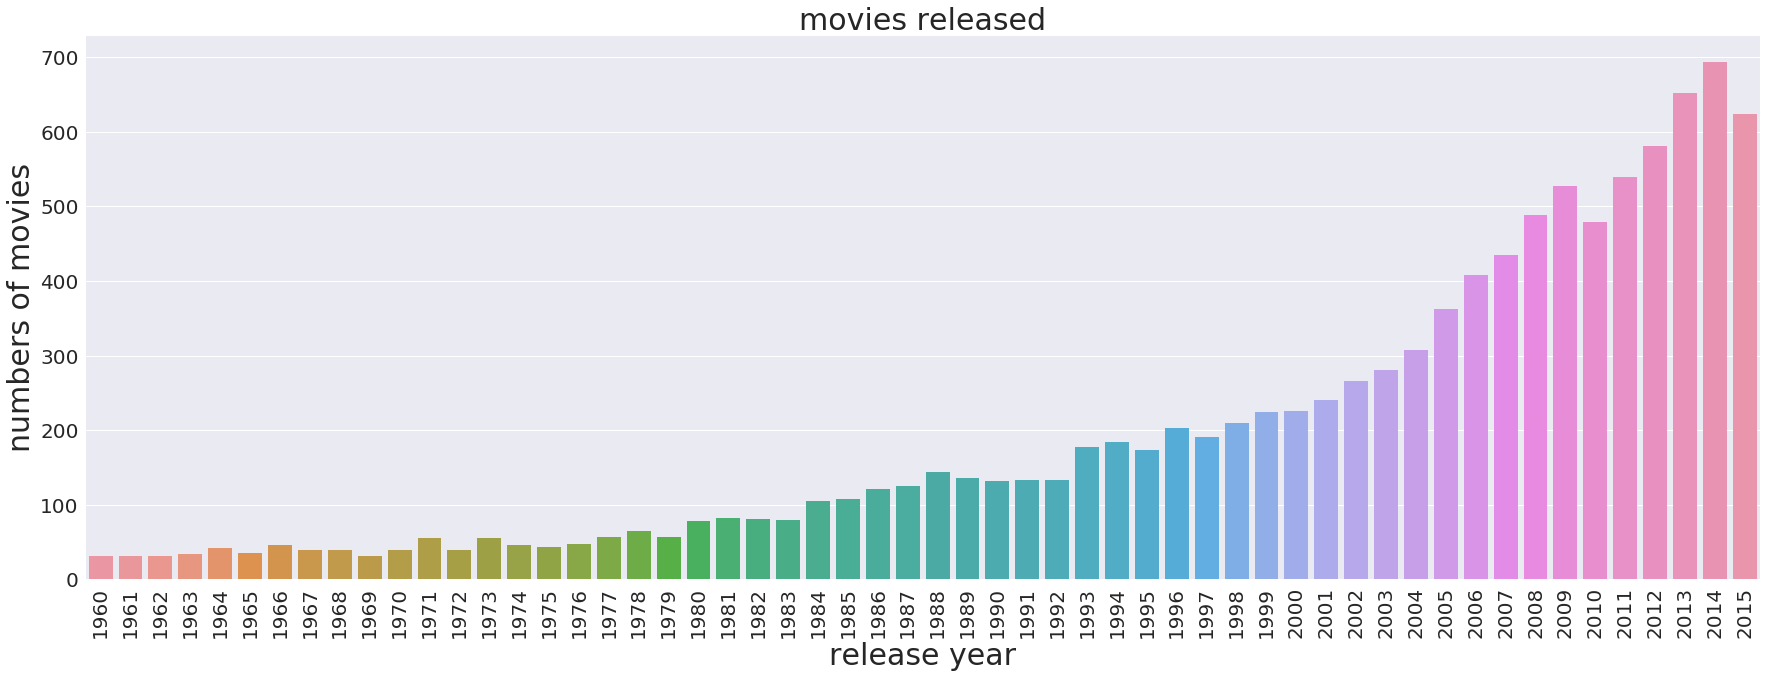

In [26]:
plt.figure(figsize=(30,10))
sns.countplot(df['release_year'])
plt.title('movies released',fontsize=30)
plt.xlabel('release year',fontsize=30)
plt.ylabel('numbers of movies',fontsize=30)
plt.xticks(rotation=90)

from the above gradh we find the numbers of released movies changed over the years and 2014 had the highest numbers of released movies

In [27]:
print('In 2014  there are {}  movies have been released.'.format(df['release_year'][df['release_year']==2014].count()))

In 2014  there are 694  movies have been released.


<a id='conclusions'></a>
## Conclusions

> From the above fig. we find the most popular genres are Drama,Comedy,Thriller,Action and Romance.

> As cleear from the above that the top 10 movies have high revenue are: 1) Avatar 2)Star Wars: The Force Awakens 3)Titanic 4)Jurassic World 5)Furious 7
6)The Avengers 7)Harry Potter and the Deathly Hallows: Part 8)Avengers: Age of Ultro 9)Frozen 10)The Net

> From the describe function and histgram of runtime column we find that the most of data concentreated from Q1:90 to Q3:111 so we will make the limitation for the run time from 50 t0 200 to avoid outliers.

> From the above we find the longest movie is The Story of Film: An Odyssey with runtime 900 (15 hours) and the shortest movies are ['Mythica: The Necromancer', 'Ronaldo', 'Anarchy Parlor', 'The Exorcism of Molly Hartley', 'If There Be Thorns', 'Deep Dark', 'The Outfield', 'Treehouse', 'Tim Maia', 'Spectacular!', 'Grande, grosso e Verdone', 'Toi, moi, les autres', 'Cell 213', 'eCupid', "Madea's Family Reunion", 'A Time for Dancing', 'Rags', 'How to Fall in Love', "Madea's Class Reunion", 'Skinwalker Ranch', 'The Food Guide to Love', 'Go Goa Gone', 'Amiche da morire', 'The Vatican Exorcisms', 'The 12 Dogs of Christmas', 'Quatre Ã©toiles', 'Jean-Philippe', 'Mission Kashmir'] with runtime 0 which is unlogic so we must remove this outliers data.
    
> From the above gragh we find the numbers of released movies changed over the years and 2014 had the highest numbers of released movies.   
        
> In 2014  there are 694  movies have been released.    

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0